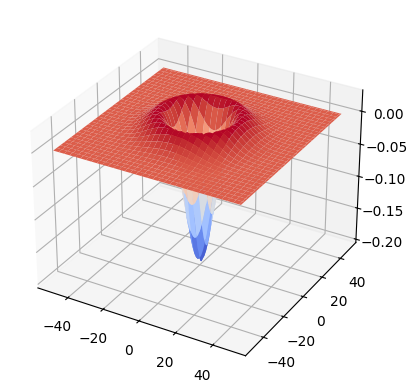

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv



sigma = 10
hw = 50
x = np.linspace(-hw,hw,2*hw+1)
y = np.linspace(-hw,hw,2*hw+1)

X,Y = np.meshgrid(x,y)

G = 1/(2*np.pi) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

#partial derivatives
Gx = cv.Sobel(G,cv.CV_64F,1,0)
Gy = cv.Sobel(G,cv.CV_64F,0,1)

Gxx = cv.Sobel(Gx,cv.CV_64F,1,0)
Gyy = cv.Sobel(Gy,cv.CV_64F,0,1)

# Gxy = cv.Sobel(Gx,cv.CV_64F,0,1)

L = Gxx + Gyy

# plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,L,cmap='coolwarm')
plt.show()


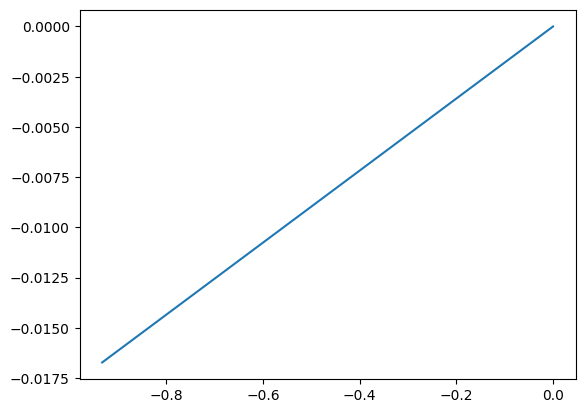

In [5]:
A = np.array( [x-np.mean(x),y-np.mean(y)] )
U,S,V = np.linalg.svd(A)

# eigenvector associated with the smallest eigenvalue
v = V[1,:]
a = V[0,0]
b = V[1]

# plot the eigenvector
plt.figure()
plt.plot([0,v[0]],[0,v[1]])
plt.show()
 

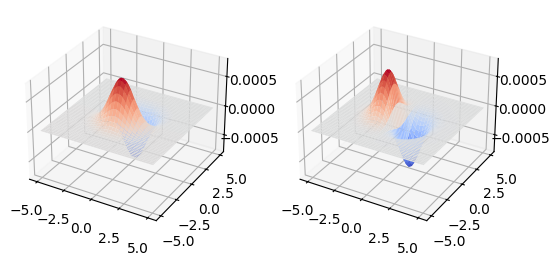

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

delta = 0.1
xx, yy = np.meshgrid(np.arange(-5, 5 + delta, delta), np.arange(-5, 5, delta))

sigma = 1
g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
g /= np.sum(g)

# sobel filter vertical and horizontal
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)

# convolution
g_v = cv.filter2D(g,-1,sobel_v)
g_h = cv.filter2D(g,-1,sobel_h)

# plot
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
surf1 = ax1.plot_surface(xx,yy,g_v,cmap='coolwarm')
surf2 = ax2.plot_surface(xx,yy,g_h,cmap='coolwarm')
plt.show()